In [246]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 初期スピン配位の生成
def initial_config(size_lat):
    return 2*(np.random.randint(0,2,size=(size_lat, size_lat))-1/2)

# Isingモデルのハミルトニアン（交換相互作用と外場）
def hamiltonian_ising(arr_spin, coupling, ex_field):
    n0, n1 = np.shape(arr_spin)
    hamiltonian = 0.0
    for i in range(-1,n0-1):
        for j in range(-1,n1-1):
            hamiltonian += -coupling*(arr_spin[i][j]*arr_spin[i][j+1] + arr_spin[i][j]*arr_spin[i+1][j])
    hamiltonian += -ex_field*np.sum(arr_spin)
    return hamiltonian

# メトロポリス法にしたがってスピン配位を更新するサブルーチン
# 副作用：フリップによるエネルギーの変化、スピン配位の更新
def update_config(arr_spin, energy, temp, coupling, ex_field):
    n0, n1 = np.shape(arr_spin)
    for i in range(0,n0):
        for j in range(0,n1):
            diff_energy = diff_hamiltonian(arr_spin, n0, n1, i, j, coupling, ex_field)
# # コードは短くなるが計算時間が長くなる。下のif-elifの組と同じ計算
#             if np.random.rand() <= np.min([1, np.exp(-diff_energy/temp)]):
#                 spin_flip(arr_spin, i, j)
#                 energy += diff_energy
            if diff_energy <= 0:
                energy += diff_energy
                spin_flip(arr_spin, i, j)
            elif np.random.rand() < np.exp(-diff_energy/temp):
                energy += diff_energy
                spin_flip(arr_spin, i, j)

# 指定のスピンをフリップしたときに生じるハミルトニアンの差分を出力
def diff_hamiltonian(arr_spin, n0, n1, i, j, coupling, ex_field):
    return 2*(coupling*(arr_spin[i][j]*arr_spin[i-1][j] + arr_spin[i][j]*arr_spin[-n0+i+1][j] 
                        + arr_spin[i][j]*arr_spin[i][j-1] + arr_spin[i][j]*arr_spin[i][-n1+j+1])
              + ex_field*arr_spin[i][j])

#指定したスピンをフリップするサブルーチン
def spin_flip(arr_spin, i, j):
    arr_spin[i][j] = -arr_spin[i][j]

# 温度に対する1サイト当たりの磁化の計算とその温度-磁化グラフのプロット
# T_c = 2J/log(sqrt(2)+1) ~ 2.27J
def magnetization_plot(size_lat, temp_min, temp_max, coupling, ex_field):
    num_update = 600
    num_update_eq = 200
    num_plot = 100
    mag_lst =[]
    mag_samples = []
    temp_lst = np.flip(np.linspace(temp_min, temp_max, num_plot))
    
    arr_spin = initial_config(size_lat)
    energy = hamiltonian_ising(arr_spin, coupling, ex_field)
    
    for temp_tmp in temp_lst:
        mag_samples = []

        for i in range(0, num_update_eq):
            update_config(arr_spin, energy, temp_tmp, coupling, ex_field)

        for i in range(0, num_update - num_update_eq):
            update_config(arr_spin, energy, temp_tmp, coupling, ex_field)
            mag_samples.append(np.sum(arr_spin)/len(arr_spin)**2)

        mag_lst.append(np.sum(mag_samples)/len(mag_samples))
    
    plt.plot(temp_lst, mag_lst)
    plt.grid(True)
    plt.ylabel("magnetization per cite")
    plt.xlabel("T")
    plt.xlim(round(temp_min,1), temp_max)
    plt.show()

In [3]:
[[j * (-1)**np.random.randint(0,2) for j in i]  for i in np.ones((10,10))]
(np.random.randint(0,2,size=(100,100))-1/2)*2

array([[-1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ..., -1., -1.,  1.],
       [-1., -1.,  1., ..., -1.,  1.,  1.],
       ...,
       [-1., -1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1.,  1.]])

-112.0
-0.0066


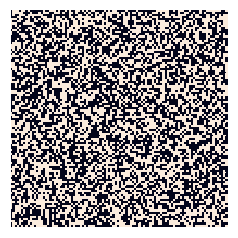

In [248]:
a=initial_config(100)
e=hamiltonian_ising(a, 1, 0.0)
print(e)
print(np.sum(a)/len(a)**2)

plt.figure()
sns.heatmap(a, cbar=False, square=True, xticklabels=False, yticklabels=False)

0.6706
0.678
0.7036
0.7426
0.663
0.6562
0.65
0.6586
0.5406
0.5216
0.5384
0.5962
0.5416
0.6538
0.6234
0.6742
0.6062
0.7056
0.6478
0.6538
CPU times: user 26.9 s, sys: 32 ms, total: 27 s
Wall time: 27 s


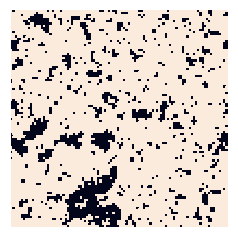

In [264]:
%%time
t_c = 2.0/np.log(np.sqrt(2.0)+1)
for i in range(0,200):
    update_config(a, e, t_c, 1.0, 0.0)
    if i%10==0 :
        print(np.sum(a)/len(a)**2)
        
plt.figure()
sns.heatmap(a, cbar=False, vmax=1, vmin=-1, square=True, xticklabels=False, yticklabels=False)

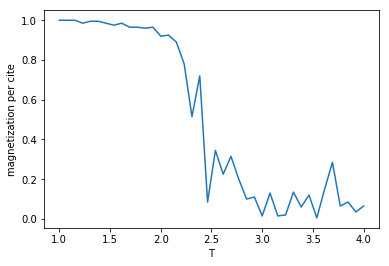

In [39]:
magnetization_plot(20, 1.0, 4.0, 1.0, 0.0)

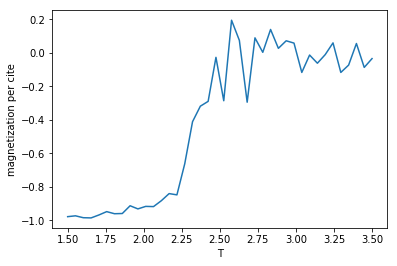

In [54]:
magnetization_plot(40, 1.5, 3.5, 1.0, 0.0)

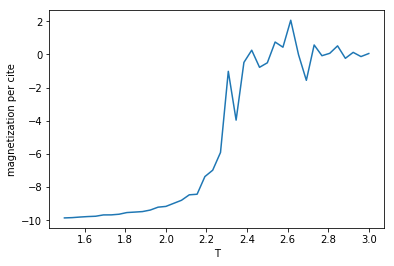

In [63]:
magnetization_plot(30, 1.5, 3.0, 1.0, 0.0)

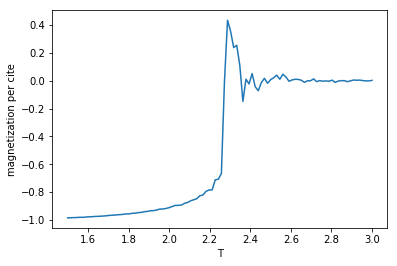

CPU times: user 4h 18min 1s, sys: 1.27 s, total: 4h 18min 2s
Wall time: 4h 18min 4s


In [87]:
%%time
magnetization_plot(100, 1.5, 3.0, 1.0, 0.0)

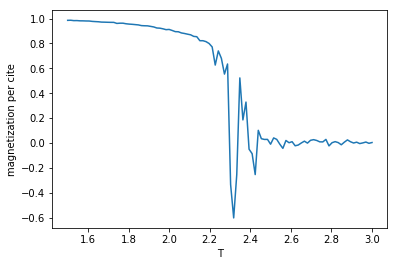

CPU times: user 1h 6min 30s, sys: 712 ms, total: 1h 6min 30s
Wall time: 1h 6min 31s


In [84]:
%%time
magnetization_plot(50, 1.5, 3.0, 1.0, 0.0)

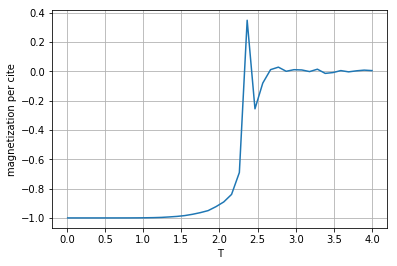

CPU times: user 5min 33s, sys: 312 ms, total: 5min 34s
Wall time: 5min 33s


In [235]:
%%time
magnetization_plot(32, 0.01, 4.0, 1.0, 0.0)

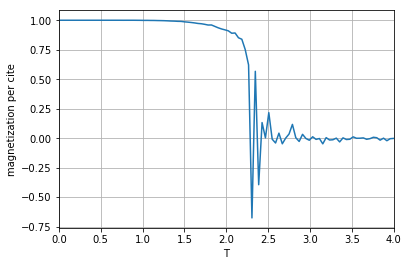

CPU times: user 3min 36s, sys: 292 ms, total: 3min 36s
Wall time: 3min 36s


In [247]:
%%time
magnetization_plot(16, 0.01, 4.0, 1.0, 0.0)